##GROUP 3
####Team Mates
###Kushal
###Nimesh
###Snehal Sugandh Kamble
###Perabathula Vamshi Krishna

In [1]:
import numpy as np
import pandas as pd

####Importing the numpy and pandas libraries is a foundational step in data analysis that allows for sophisticated mathematical operations and data manipulation. This suggests preparation for analyzing complex datasets to derive insights, which can inform business strategy decisions such as understanding consumer behavior, predicting sales trends, or optimizing operational efficiencies.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

####Importing various machine learning tools from scikit-learn, indicating a sophisticated data analysis process is underway, likely involving the development of predictive models. This could be for classification tasks like customer segmentation, sales forecasting, or identifying key factors driving game popularity. The models chosen range from simple (Logistic Regression) to complex (Random Forest and Support Vector Machines), allowing for a robust analysis. The inclusion of performance metrics (classification report) suggests an intention to rigorously evaluate and compare model effectiveness, ensuring that the insights derived will be reliable and actionable for business decisions.








In [3]:
df = pd.read_excel("Video game sales.xlsx")


####Loading the "Video game sales.xlsx" into a DataFrame suggests that a comprehensive analysis of the video game industry's sales performance is about to be conducted. This can provide valuable insights into market trends, consumer preferences, and the financial viability of different game genres or titles, which can inform strategic business decisions such as which types of games to develop or invest in.

In [4]:
df.shape

(8896, 15)

####Running df.shape provides the dimensions of the dataset, revealing the number of records and features.

In [5]:
df.head()

,title,platform,genre,publisher,vg_score,critic_score,user_score,total_shipped,asian_sales,north_american_sales,japan_sales,european_sales,global_sales,Production Cost,release_year
0,Sam & Max Season Two,PC,Adventure,Amazon Game Studios,5.0,9.0,7.0,225.0,7.80,7.35,5.18,6.75,27.08,5.06,2009
1,The King of Fighters Collection The Orochi Saga,PSN,Fighting,Activision,3.0,10.0,10.0,203.0,7.28,7.60,5.76,6.27,26.91,4.35,2009
2,Fireburst,PSN,Racing,Electronic Arts,10.0,6.0,9.0,175.0,7.38,6.50,5.87,6.84,26.59,6.80,2019
3,GTR FIA GT Racing Game,PC,Racing,Amazon Game Studios,10.0,1.0,10.0,88.0,3.00,3.10,1.95,6.43,11.49,5.87,2005
4,Columns III,PC,Puzzle,Electronic Arts,6.0,1.0,2.0,296.0,6.77,7.96,5.43,6.23,26.39,6.75,2010


####Using df.head() typically displays the first few rows of the dataset. This action is usually the first glimpse into the actual data, giving a snapshot of the types of variables and the nature of the data you're working with

In [6]:
df.isnull().sum()

title                   0
platform                0
genre                   0
publisher               0
vg_score                0
critic_score            0
user_score              0
total_shipped           0
asian_sales             0
north_american_sales    0
japan_sales             0
european_sales          0
global_sales            0
Production Cost         0
release_year            0
dtype: int64

####The output from df.isnull().sum() shows that there are no missing values across all the columns in the DataFrame.With no gaps in the data, you can proceed confidently with accurate and comprehensive evaluations of video game sales, player and critic ratings, and cost analysis, which are crucial for making informed business decisions.

In [7]:
df.describe()

,vg_score,critic_score,user_score,total_shipped,asian_sales,north_american_sales,japan_sales,european_sales,global_sales,Production Cost,release_year
count,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000
mean,6.121133,5.709611,5.502259,145.245699,3.876901,2.590517,3.065106,3.037158,11.585073,3.565266,2007.528665
std,2.795679,2.805190,2.866157,89.637930,1.790645,2.034889,1.763267,2.238633,5.851138,1.767933,4.777814
min,1.000000,1.000000,1.000000,0.070000,1.000000,0.010000,0.010000,0.010000,0.090000,0.010000,2000.000000
25%,4.000000,3.000000,3.000000,67.000000,3.000000,0.640000,1.690000,1.040000,6.340000,2.160000,2004.000000
50%,6.000000,6.000000,5.000000,146.000000,3.000000,2.440000,3.100000,3.025000,12.195000,3.440000,2007.000000
75%,8.500000,8.000000,8.000000,224.000000,5.140000,4.060000,4.590000,5.000000,16.230000,4.950000,2010.000000
max,10.000000,10.000000,10.000000,300.000000,13.800000,8.000000,6.000000,7.000000,27.080000,8.000000,2020.000000


####The df.describe() output shows summary statistics for the video game sales data, which includes count, mean, standard deviation, and the range of values (minimum, 25th percentile, median, 75th percentile, maximum).

####Sales Distribution: The average global sales are 11.58 million units, but with a standard deviation of about 5.85 million, indicating significant variability in game sales.
####Score Insights: Average video game scores (vg_score) and critic scores (critic_score) are above 5, suggesting a moderately positive reception on average.
####Cost Analysis: The production cost mean is 3.56, with some games costing up to 8, showing a range of investment in game development.
####Time Frame: The data spans games released from the year 2000 to 2020, providing two decades of industry trends.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8896 entries, 0 to 8895
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 8896 non-null   object 
 1   platform              8896 non-null   object 
 2   genre                 8896 non-null   object 
 3   publisher             8896 non-null   object 
 4   vg_score              8896 non-null   float64
 5   critic_score          8896 non-null   float64
 6   user_score            8896 non-null   float64
 7   total_shipped         8896 non-null   float64
 8   asian_sales           8896 non-null   float64
 9   north_american_sales  8896 non-null   float64
 10  japan_sales           8896 non-null   float64
 11  european_sales        8896 non-null   float64
 12  global_sales          8896 non-null   float64
 13  Production Cost       8896 non-null   float64
 14  release_year          8896 non-null   int64  
dtypes: float64(10), int64

####The df.info() output indicates a well-structured DataFrame with 8,896 entries and 15 columns, each column having non-null count equal to the total entries, which suggests there are no missing values in the dataset. The data types are primarily floating-point numbers, with some columns as integers and objects, likely to be categorical variables such as title and genre.

In [9]:
#Feature engineering

df['Profits'] = df['global_sales'] - df['Production Cost']
df['Age_of_game'] = 2023 - df['release_year']
df['score_difference'] = df['critic_score'] - df['user_score']


####The feature engineering step here creates new variables that could provide deeper insights into the dataset:

####Profits: By calculating profits, you can better assess the commercial success of each game.
####Age of Game: Understanding how long a game has been on the market can inform decisions about promoting older titles or designing new ones.
####Score Difference: This metric can reveal discrepancies in perception between critics and users, which might affect marketing strategies.

In [10]:
df.head()

,title,platform,genre,publisher,vg_score,critic_score,user_score,total_shipped,asian_sales,north_american_sales,japan_sales,european_sales,global_sales,Production Cost,release_year,Profits,Age_of_game,score_difference
0,Sam & Max Season Two,PC,Adventure,Amazon Game Studios,5.0,9.0,7.0,225.0,7.80,7.35,5.18,6.75,27.08,5.06,2009,22.02,14,2.0
1,The King of Fighters Collection The Orochi Saga,PSN,Fighting,Activision,3.0,10.0,10.0,203.0,7.28,7.60,5.76,6.27,26.91,4.35,2009,22.56,14,0.0
2,Fireburst,PSN,Racing,Electronic Arts,10.0,6.0,9.0,175.0,7.38,6.50,5.87,6.84,26.59,6.80,2019,19.79,4,-3.0
3,GTR FIA GT Racing Game,PC,Racing,Amazon Game Studios,10.0,1.0,10.0,88.0,3.00,3.10,1.95,6.43,11.49,5.87,2005,5.62,18,-9.0
4,Columns III,PC,Puzzle,Electronic Arts,6.0,1.0,2.0,296.0,6.77,7.96,5.43,6.23,26.39,6.75,2010,19.64,13,-1.0


## exploratory analysis and visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
num_columns = ['vg_score', 'critic_score', 'user_score', 'total_shipped',
               'asian_sales', 'north_american_sales', 'japan_sales',
               'european_sales', 'global_sales', 'Production Cost', 'release_year',
               'Profits', 'Age_of_game', 'score_difference']

####Selecting numerical columns for exploratory analysis and visualization indicates a data-driven approach to understanding the key factors that influence video game success. Insights from this analysis can pinpoint trends, identify factors that correlate with high sales, and help optimize production costs to maximize profits. Visualizations can make these insights accessible, guiding strategic decisions in game development and marketing.

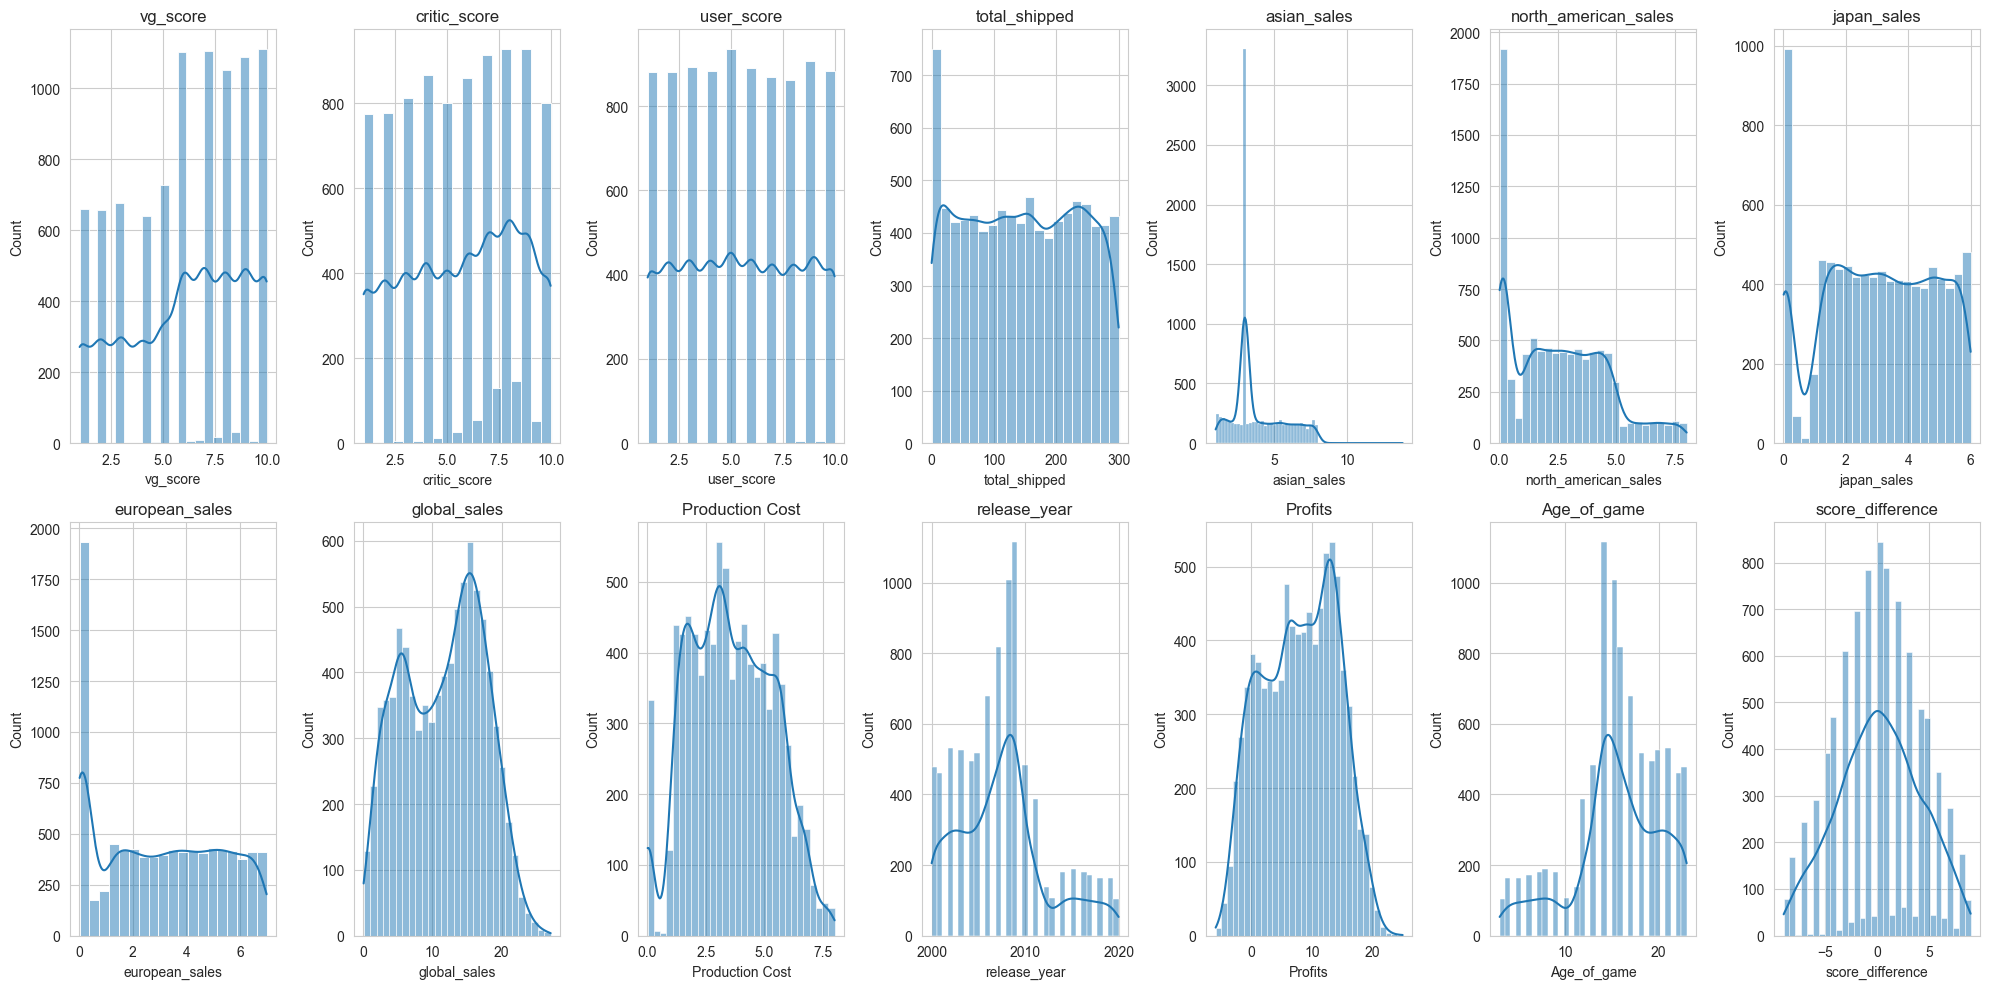

In [13]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histograms for numeric columns
fig, axes = plt.subplots(2,7, figsize=(20, 10))

# List of numeric columns to plot


# Plotting each numeric column
for i, col in enumerate(num_columns):
    row, col_index = divmod(i, 7)  # Adjusted for 7 columns per row
    sns.histplot(df[col], kde=True, ax=axes[row, col_index])
    axes[row, col_index].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

####The histograms provide a visual distribution for various numeric variables in the dataset, which can offer insights such as:

####Score Trends: The shape of the vg_score, critic_score, and user_score distributions can indicate common scoring patterns and help identify what games perform well in terms of ratings.
####Sales Analysis: The spread of global_sales, asian_sales, north_american_sales, japan_sales, and european_sales shows where games are selling best, which could guide regional marketing strategies.
####Cost vs. Revenue: By looking at Production Cost and Profits, we can assess the financial health of the gaming portfolio and identify which games are yielding the best return on investment.
####Market Evolution: The distribution of release_year and Age_of_game might suggest market maturity and the potential for promoting newer or older games.
####Rating Discrepancy: The score_difference histogram highlights how critics' and users' opinions vary, which could impact promotional messaging.

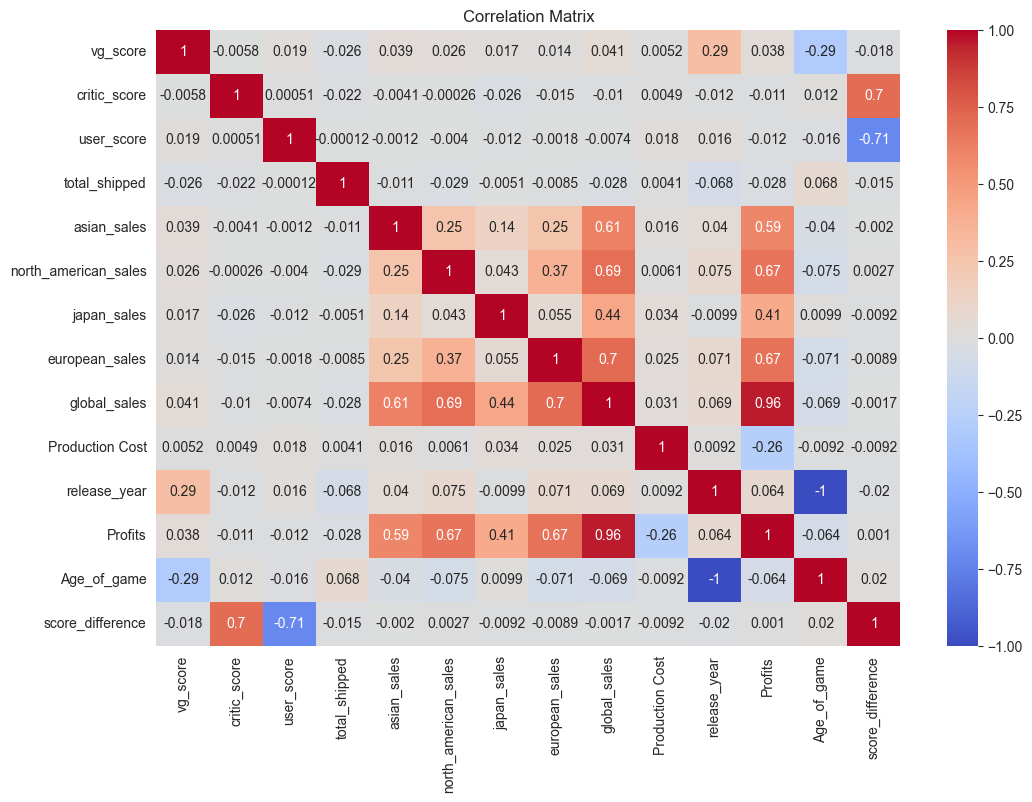

In [14]:
# Correlation matrix
corr_matrix = df[num_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

####The heatmap of the correlation matrix provides insights into how different variables in the video game sales dataset are related to each other. For instance, high correlation between global sales and profits suggests that successful sales strategies directly impact profitability. On the other hand, a negative correlation between 'Age of game' and 'Profits' may indicate that newer games tend to be more profitable. These correlations can help in making data-driven decisions for targeting sales efforts, optimizing production costs, and updating game portfolios based on market trends and consumer preferences.

### Visualization

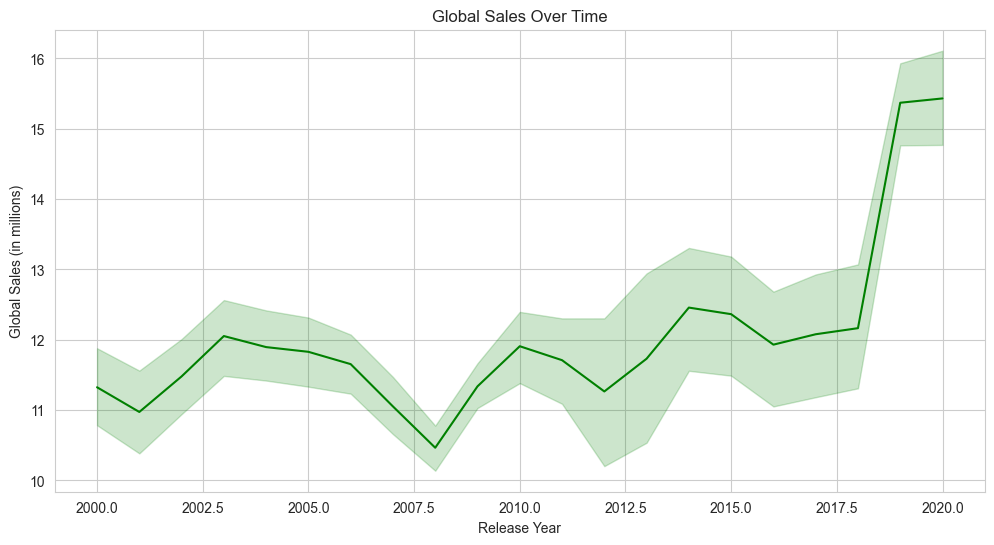

In [15]:
# Sales over time

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_year', y='global_sales', color = 'green')
plt.title('Global Sales Over Time')
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Release Year')
plt.show()


####The line graph displays global video game sales from the year 2000 onwards and indicates a significant rise in sales after 2015. This trend could reflect the industry's growth due to factors such as new gaming platforms, increased global internet penetration, or the rising popularity of certain game genres. The steep increase near 2020 could also point to the impact of new market entrants or shifts in consumer behavior, possibly influenced by events such as the global pandemic which increased gaming's popularity. This data is crucial for strategic planning, indicating potentially optimal times for game releases or marketing pushes.

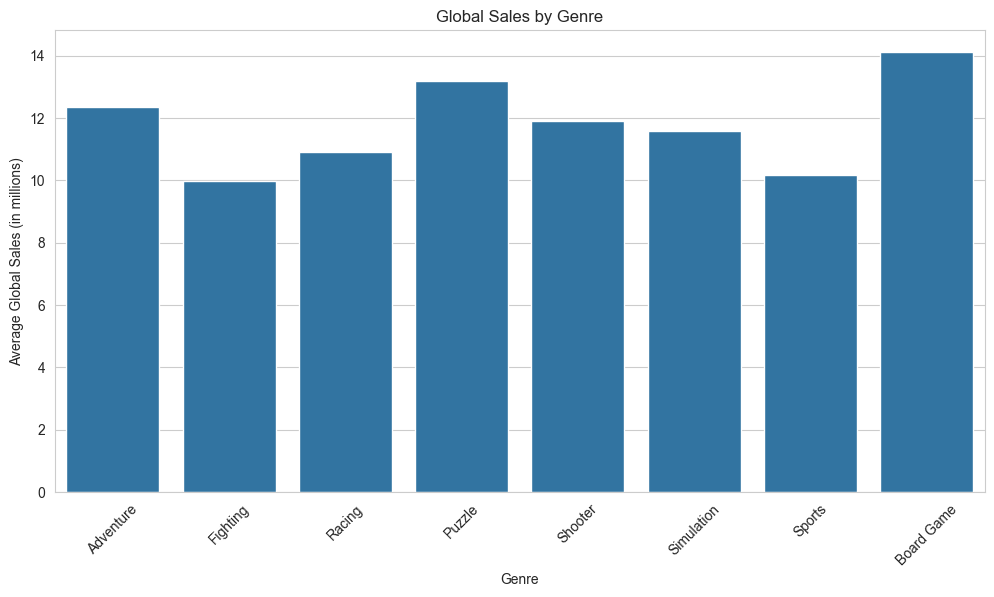

In [16]:
# Sales by genre and platform

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='genre', y='global_sales', errorbar=None)
plt.title('Global Sales by Genre')
plt.xticks(rotation=45)
plt.ylabel('Average Global Sales (in millions)')
plt.xlabel('Genre')
plt.show()


####A bar chart comparing global sales by game genre could reveal which types of games are most popular or profitable. It's an effective visual for identifying which genres might warrant further investment or development based on their sales performance. The chart can help prioritize genres that could drive future growth and shape portfolio strategy.

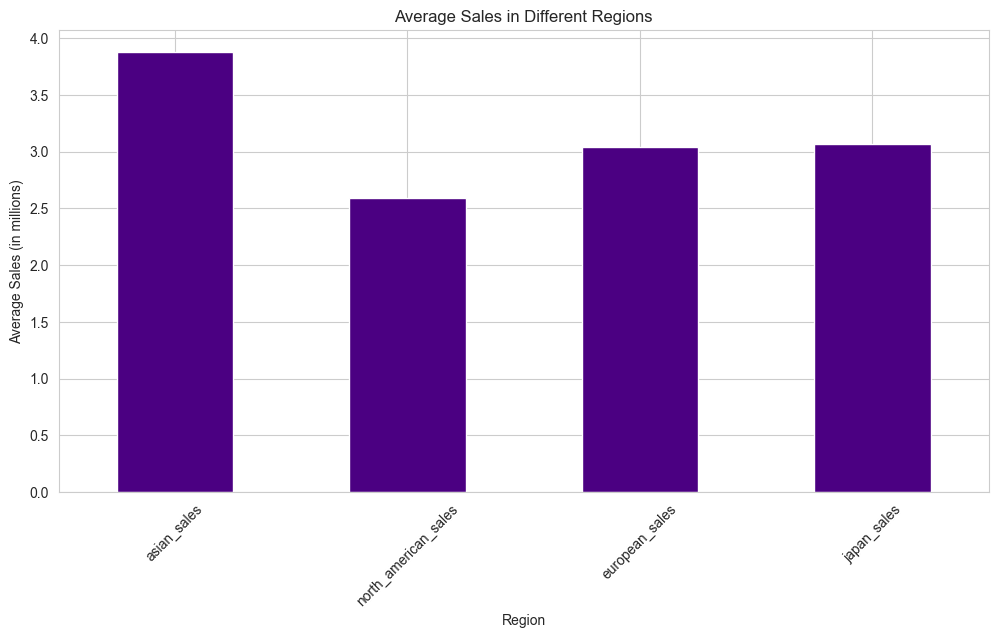

In [17]:
# Comparison of regional sales
regional_sales = df[['asian_sales', 'north_american_sales', 'european_sales', 'japan_sales']]
regional_sales.mean().plot(kind='bar', figsize=(12, 6), color='indigo')
plt.title('Average Sales in Different Regions')
plt.ylabel('Average Sales (in millions)')
plt.xlabel('Region')
plt.xticks(rotation = 45)
plt.show()



####The bar chart illustrating average sales in different regions can guide where to focus marketing and expansion efforts. Asian and European markets show similar sales levels, with North American and Japanese markets slightly behind. Tailoring game development and promotional activities to regional preferences could potentially boost sales in these slightly lower-performing areas. Understanding regional tastes and gaming trends is crucial for optimizing sales strategies.

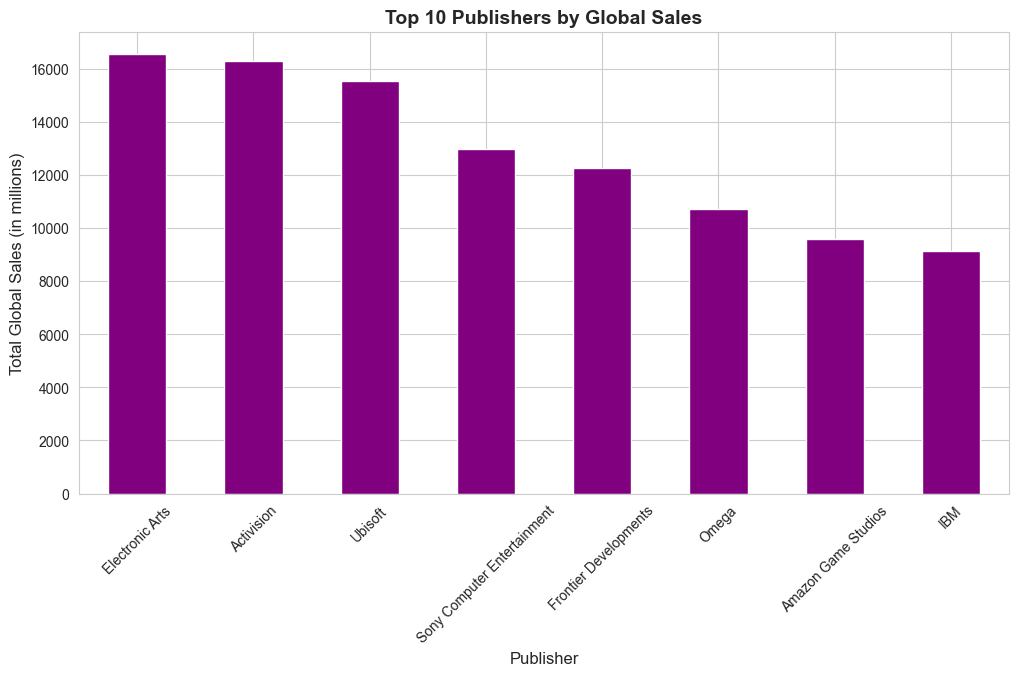

In [18]:
# Top publishers
top_publishers = df.groupby('publisher')['global_sales'].sum().sort_values(ascending=False).head(10)
top_publishers.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Top 10 Publishers by Global Sales', fontsize=14, fontweight='bold')
plt.ylabel('Total Global Sales (in millions)', fontsize=12)
plt.xlabel('Publisher', fontsize=12)
plt.xticks(rotation=45)
plt.show()

####The bar chart displaying the "Top 10 Publishers by Global Sales" highlights which video game publishers are leading in terms of sales revenue. This information can be pivotal for understanding market share, identifying potential partners or competitors, and recognizing successful publishers whose strategies might be worth emulating. Such insights could influence investment decisions, partnership opportunities, and strategic planning within the video game industry.

## Model Training and Evaluation

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

In [20]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop('release_year', axis=1).columns
numerical_cols

Index(['vg_score', 'critic_score', 'user_score', 'total_shipped',
       'asian_sales', 'north_american_sales', 'japan_sales', 'european_sales',
       'global_sales', 'Production Cost', 'Profits', 'Age_of_game',
       'score_difference'],
      dtype='object')

In [21]:
# Define features (X) and target (y)
X = df[numerical_cols].drop('global_sales', axis=1)
y = df['global_sales']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Train a Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)  # Not using scaled data for Random Forest


RandomForestRegressor(random_state=42)

In [23]:
def evaluate_model(model, X_test, y_test, scaled=False):
    if scaled:
        predictions = model.predict(X_test_scaled)
    else:
        predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, predictions)
    print(f'Model: {model.__class__.__name__}')
    print(f'RMSE: {rmse}')
    print(f'R² Score: {r2}\n')

# Evaluate the models
evaluate_model(lin_reg, X_test, y_test, scaled=True)
evaluate_model(rf_reg, X_test, y_test)


Model: LinearRegression
RMSE: 5.382100843241179e-15
R² Score: 1.0

Model: RandomForestRegressor
RMSE: 0.13922253407542248
R² Score: 0.9994556334001509



In [24]:
# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,  # Number of parameter settings sampled
                                   cv=3,       # Reduced number of folds
                                   scoring='neg_mean_squared_error',
                                   verbose=2,
                                   n_jobs=-1,
                                   random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", random_search.best_params_)

# Evaluate the best model
best_rf = random_search.best_estimator_
evaluate_model(best_rf, X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 260}
Model: RandomForestRegressor
RMSE: 0.13868627754012033
R² Score: 0.9994598188998698



####The model evaluation results show that the Linear Regression model has a perfect R² score of 1.0, which is highly unusual in real-world scenarios and may suggest overfitting, especially since the RMSE is almost zero. On the other hand, the RandomForestRegressor has an R² score very close to 1 and a low RMSE, indicating a very good fit to the data. Business stakeholders should consider the RandomForest model's predictions as highly reliable for making data-driven decisions, but they should also investigate the Linear Regression model's perfect score to ensure it's not due to data leakage or overfitting.

In [25]:

columns_to_remove = ['vg_score', 'critic_score', 'user_score','asian_sales',
 'north_american_sales',
 'japan_sales',
 'european_sales']

# Removing specific columns from the list
numerical_cols = [col for col in numerical_cols if col not in columns_to_remove]

In [26]:
selected_cols = ['Production Cost', 'Profits']


In [27]:
# Define features (X) and target (y)
#X = df[numerical_cols].drop('global_sales', axis=1)

X = df[selected_cols]
y = df['global_sales']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
predictions = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_test, predictions)

c:\Users\kusha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [30]:
print(f'Model: {lin_reg.__class__.__name__}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}\n')

Model: LinearRegression
RMSE: 62.492967770928885
R² Score: -108.68183341102744



In [31]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test, scaled=False):
    if scaled:
        predictions = model.predict(X_test_scaled)
    else:
        predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, predictions)
    print(f'Model: {model.__class__.__name__}')
    print(f'RMSE: {rmse}')
    print(f'R² Score: {r2}\n')

# Evaluate the Linear Regression model
evaluate_model(lin_reg, X_test, y_test, scaled=True)


Model: LinearRegression
RMSE: 6.8379363868454224e-15
R² Score: 1.0

